In [ ]:
# Importa bibliotecas
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

# Importando e Análisando os dados do dataset

In [ ]:
df_original = pd.read_csv("MCMV.csv", encoding="cp860", index_col=False)

In [ ]:
df = df_original
df.head()


,FID,UF,COD_IBGE,CAPITAIS,XCOORD,YCOORD,Municipio,UF_1,Faixa_de_r,Produto,...,Concluidas,Entregues,Sub_FGTS,Sub_OGU,Percentual,IF,PMCMV,Faixa,UH_CONC,the_geom
0,MCMV.20227,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 3,CCFGTS,...,0,0,0.0,0.0,89.92,Caixa,1,75-95,40,POINT (-47.92972 -15.779719999999884)
1,MCMV.20199,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 3,CCFGTS,...,166,166,0.0,0.0,100.00,Caixa,1,95-100,0,POINT (-47.92972 -15.779719999999884)
2,MCMV.20200,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 3,CCFGTS,...,198,198,0.0,0.0,100.00,Caixa,2,95-100,0,POINT (-47.92972 -15.779719999999884)
3,MCMV.20201,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 2,CCFGTS,...,0,0,1378130.0,459376.0,0.00,Caixa,2,0-50,416,POINT (-47.92972 -15.779719999999884)
4,MCMV.20202,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 2,CCFGTS,...,0,0,0.0,0.0,1.00,Caixa,1,0-50,100,POINT (-47.92972 -15.779719999999884)


In [ ]:
np.unique(df["Produto"])

array(['CCFGTS', 'Entidades', 'FAR', 'FAR - Urbaniza├╛├Èo',
       'Oferta Publica', 'Rural'], dtype=object)

In [ ]:
df.columns

Index(['FID', 'UF', 'COD_IBGE', 'CAPITAIS', 'XCOORD', 'YCOORD', 'Municipio',
       'UF_1', 'Faixa_de_r', 'Produto', 'UH', 'Valor', 'Concluidas',
       'Entregues', 'Sub_FGTS', 'Sub_OGU', 'Percentual', 'IF', 'PMCMV',
       'Faixa', 'UH_CONC', 'the_geom'],
      dtype='object')

# Regressão Linear

----

In [ ]:
df_filtered = df[(df['Percentual'] == 100)]

In [ ]:
df_plot = df_filtered[["Produto", "Concluidas", "Entregues", "UH", "Valor"]]

In [ ]:
df_plot = df_plot.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


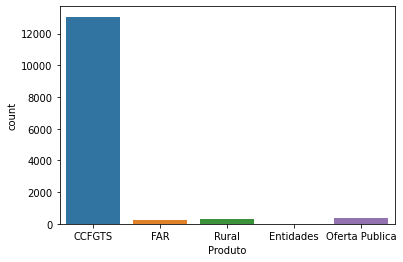

In [ ]:
sns.countplot(df_plot["Produto"])

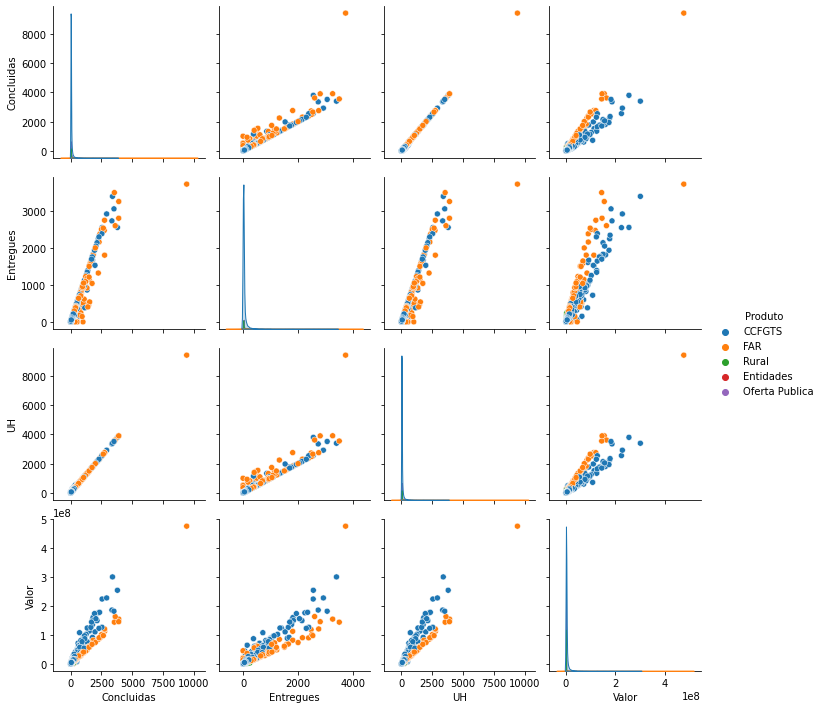

In [ ]:
sns.pairplot(df_plot, hue="Produto")

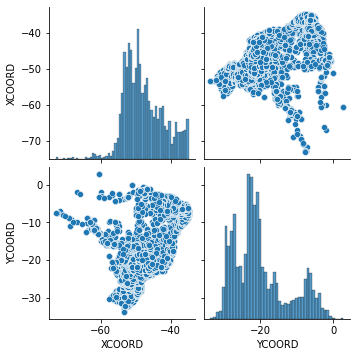

In [ ]:
df_plot_ = df_filtered[["XCOORD", "YCOORD"]]

sns.pairplot(df_plot_)


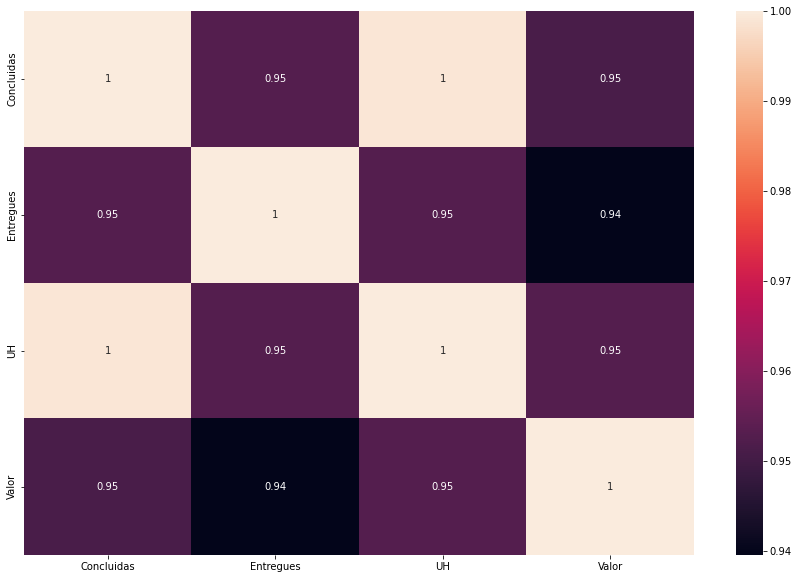

In [ ]:
df_plot = df_filtered[["Concluidas", "Entregues", "UH", "Valor"]]
df_correlacao = df_plot.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_correlacao, annot=True, ax=ax)

In [ ]:
# Valor 
# UH
X = df_filtered[["UH"]]
y = df_filtered[["Valor"]]
y

,Valor
1,14770500.0
2,18329800.0
21,5450000.0
30,45104100.0
31,9245000.0
...,...
20224,110988.0
20225,1410650.0
20226,991098.0
20227,4672700.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
a_coeff = modelo.coef_
l_coeff = modelo.intercept_

In [ ]:
print("Coeficiente Angular: "+ str(a_coeff))
print("Coeficiente Linear: "+ str(l_coeff))

Coeficiente Angular: [[56527.84186355]]
Coeficiente Linear: [209921.68519239]


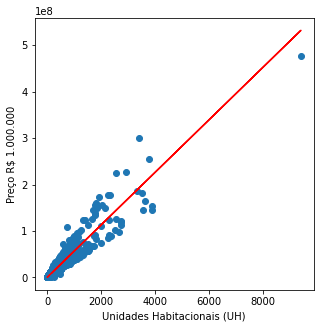

In [ ]:
fig, ax = plt.subplots(figsize=(5,5)) 
plt.scatter(X, y)
plt.plot(X, l_coeff + a_coeff*X, color="red")
plt.xlabel('Unidades Habitacionais (UH)')
plt.ylabel('Preço R$ 1.000.000')
plt.show()

# **Regressão Logística**

---


In [ ]:
df_pmcmv = df[["UH", "Valor", "Sub_FGTS", "Sub_OGU", "PMCMV"]]

Text(0, 0.5, 'Valor')

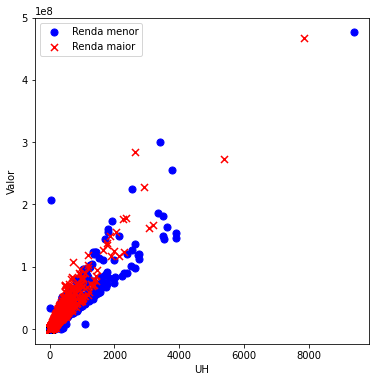

In [ ]:
positive = df_pmcmv[df_pmcmv['PMCMV'].isin([1])]  
negative = df_pmcmv[df_pmcmv['PMCMV'].isin([2])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['UH'], positive['Valor'], s=50, c='b', marker='o', label='Renda menor')  
ax.scatter(negative['UH'], negative['Valor'], s=50, c='r', marker='x', label='Renda maior')  
ax.legend()  
ax.set_xlabel('UH')  
ax.set_ylabel('Valor')  

In [ ]:
# Divide em treino e teste 70-30
X = df_pmcmv[["Sub_FGTS", "Sub_OGU"]].values
y = df_pmcmv[["PMCMV"]].values

# Definindo valores que serão utilizados
# Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

y_test


array([[1],
       [1],
       [1],
       ...,
       [2],
       [1],
       [2]])

In [ ]:
logit = LogisticRegression()
# treina o modelo
logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# faz predicao e salva em y_pred
y_pred = logit.predict(X_test)
y_pred

array([1, 1, 1, ..., 2, 1, 1])

In [ ]:
# acuracia
logit.score(X_test, y_test)

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

# outras metricas
print(classification_report(y_test, y_pred))

[[3282    0]
 [ 562 2225]]
              precision    recall  f1-score   support

           1       0.85      1.00      0.92      3282
           2       1.00      0.80      0.89      2787

    accuracy                           0.91      6069
   macro avg       0.93      0.90      0.90      6069
weighted avg       0.92      0.91      0.91      6069



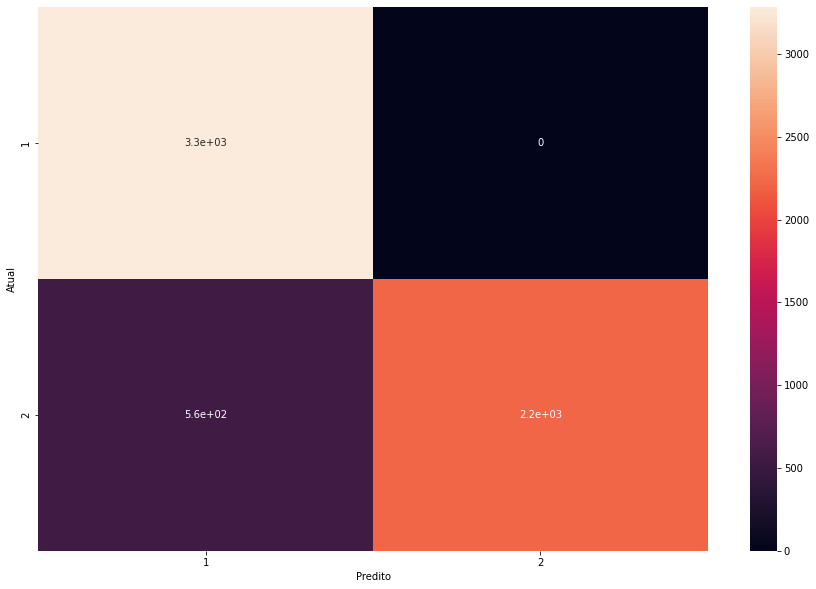

In [ ]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test.flatten(), y_pred, rownames=['Atual'], colnames=['Predito'])

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92      3282
           2       1.00      0.80      0.89      2787

    accuracy                           0.91      6069
   macro avg       0.93      0.90      0.90      6069
weighted avg       0.92      0.91      0.91      6069



In [ ]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train, y_train)

score = logisticRegression.score(X_test, y_test)

print("Acurácia geral: ", score)

Acurácia geral:  0.9073982534190147


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Regressão Logistica Faixa de Renda

In [ ]:
df_pmcmv = df[["UH", "Valor", "Sub_FGTS", "Sub_OGU", "PMCMV", "XCOORD", "YCOORD", "Faixa_de_r", "Produto"]]

In [ ]:
def faixa_de_renda(data):
    if data == "Faixa 1":
      return int(1)
    if data == "Faixa 2":
      return int(2)
    if data == "Faixa 3":
      return int(3)
    # return int(0)        

df_pmcmv["faixa_de_renda"] = df_pmcmv["Faixa_de_r"].apply(faixa_de_renda)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
valor_por_uh = []
for line in df_pmcmv.index:
  valor_por_uh.append(df_pmcmv["Valor"][line]/df_pmcmv["UH"][line])

df_pmcmv["valor_por_uh"] = valor_por_uh
df_pmcmv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,UH,Valor,Sub_FGTS,Sub_OGU,PMCMV,XCOORD,YCOORD,Faixa_de_r,Produto,faixa_de_renda,valor_por_uh
0,40,5200000.0,0.0,0.00,1,-47.9297,-15.77970,Faixa 3,CCFGTS,3,130000.000000
1,166,14770500.0,0.0,0.00,1,-47.9297,-15.77970,Faixa 3,CCFGTS,3,88978.915663
2,198,18329800.0,0.0,0.00,2,-47.9297,-15.77970,Faixa 3,CCFGTS,3,92574.747475
3,416,22019400.0,1378130.0,459376.00,2,-47.9297,-15.77970,Faixa 2,CCFGTS,2,52931.250000
4,100,11686100.0,0.0,0.00,1,-47.9297,-15.77970,Faixa 2,CCFGTS,2,116861.000000
...,...,...,...,...,...,...,...,...,...,...,...
20224,2,110988.0,21959.5,7319.84,2,-61.9953,-11.92830,Faixa 2,CCFGTS,2,55494.000000
20225,23,1410650.0,0.0,0.00,1,-63.0325,-9.90571,Faixa 1,CCFGTS,1,61332.608696
20226,18,991098.0,322002.0,107334.00,2,-63.0325,-9.90571,Faixa 1,CCFGTS,1,55061.000000
20227,61,4672700.0,0.0,0.00,1,-63.0325,-9.90571,Faixa 2,CCFGTS,2,76601.639344


In [ ]:
def produto_tipo(data):
    if data == "CCFGTS":
      return int(1)
    if data == "Entidades":
      return int(2)
    if data == "Oferta Publica":
      return int(3)
    if data ==  "FAR":
      return int(4)
    if data ==  "Rural":
      return int(5)
    else:
      return int(0)        

df_pmcmv["produto_tipo"] = df_pmcmv["Produto"].apply(produto_tipo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Valor')

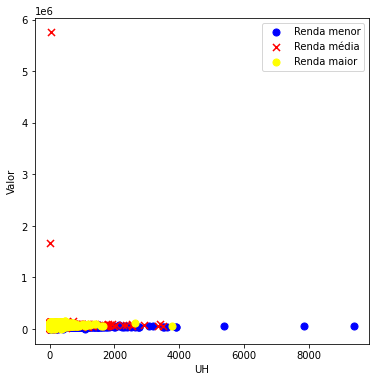

In [ ]:
menor = df_pmcmv[df_pmcmv['faixa_de_renda'].isin([1])]  
medio = df_pmcmv[df_pmcmv['faixa_de_renda'].isin([2])]
maior = df_pmcmv[df_pmcmv['faixa_de_renda'].isin([3])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(menor['UH'], menor['valor_por_uh'], s=50, c='b', marker='o', label='Renda menor')  
ax.scatter(medio['UH'], medio['valor_por_uh'], s=50, c='r', marker='x', label='Renda média')  
ax.scatter(maior['UH'], maior['valor_por_uh'], s=50, c='#ffff00', marker='o', label='Renda maior')  
ax.legend()  
ax.set_xlabel('UH')  
ax.set_ylabel('Valor')  

Text(0, 0.5, 'Y')

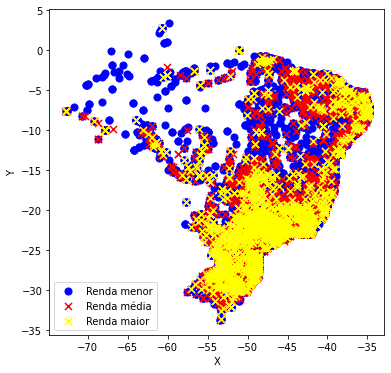

In [ ]:
menor = df_pmcmv[df_pmcmv['faixa_de_renda'].isin([1])]  
medio = df_pmcmv[df_pmcmv['faixa_de_renda'].isin([2])]
maior = df_pmcmv[df_pmcmv['faixa_de_renda'].isin([3])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(menor['XCOORD'], menor['YCOORD'], s=50, c='b', marker='o', label='Renda menor')  
ax.scatter(medio['XCOORD'], medio['YCOORD'], s=50, c='r', marker='x', label='Renda média')  
ax.scatter(maior['XCOORD'], maior['YCOORD'], s=50, c='#ffff00', marker='x', label='Renda maior')  
ax.legend()  
ax.set_xlabel('X')  
ax.set_ylabel('Y')  

In [ ]:
# Divide em treino e teste 70-30
X = df_pmcmv[["XCOORD","valor_por_uh", "produto_tipo"]].values
y = df_pmcmv[["faixa_de_renda"]].values

# Definindo valores que serão utilizados
# Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_test


array([[-4.40805000e+01,  1.01250000e+05,  1.00000000e+00],
       [-4.97080000e+01,  5.22278333e+04,  1.00000000e+00],
       [-4.67526000e+01,  8.46775472e+04,  1.00000000e+00],
       ...,
       [-5.26783000e+01,  4.90000000e+04,  4.00000000e+00],
       [-4.21026000e+01,  8.08226667e+04,  1.00000000e+00],
       [-4.11371000e+01,  6.75000000e+04,  1.00000000e+00]])

In [ ]:
logit = LogisticRegression()
# treina o modelo
logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# faz predicao e salva em y_pred
y_pred = logit.predict(X_test)
y_pred

array([2, 1, 2, ..., 1, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# acuracia
logit.score(X_test, y_test)

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

# outras metricas
print(classification_report(y_test, y_pred))

[[3370  864    0]
 [ 751 2154    0]
 [ 264  689    0]]
              precision    recall  f1-score   support

           1       0.77      0.80      0.78      4234
           2       0.58      0.74      0.65      2905
           3       0.00      0.00      0.00       953

    accuracy                           0.68      8092
   macro avg       0.45      0.51      0.48      8092
weighted avg       0.61      0.68      0.64      8092



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predito     1     2
Atual              
1        3370   864
2         751  2154
3         264   689


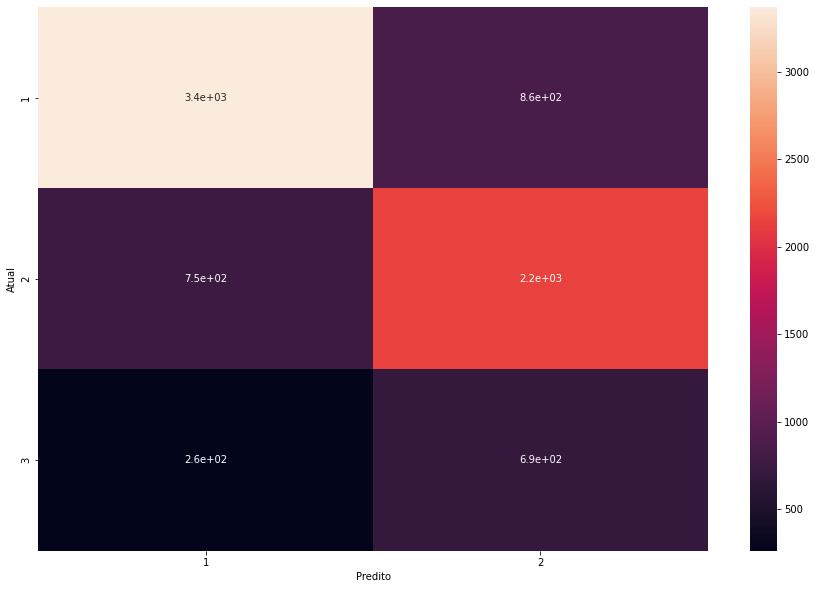

In [ ]:
# Visualizando matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = pd.crosstab(y_test.flatten(), y_pred, rownames=['Atual'], colnames=['Predito'])
# confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.80      0.78      4234
           2       0.58      0.74      0.65      2905
           3       0.00      0.00      0.00       953

    accuracy                           0.68      8092
   macro avg       0.45      0.51      0.48      8092
weighted avg       0.61      0.68      0.64      8092



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train, y_train)

score = logisticRegression.score(X_test, y_test)

print("Acurácia geral: ", score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia geral:  0.6826495304003954
